# Connecting Rods

### Original mage

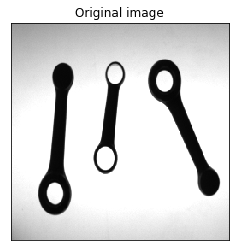

In [598]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))

original_img = cv.imread('testImages/TESI00.BMP', 0)
img = original_img.copy()
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply Otsu's tresholding

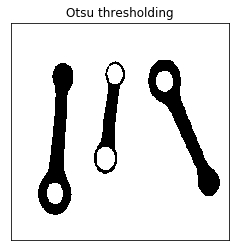

In [599]:
plt.figure(figsize=(4,4))

ret, imgf = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

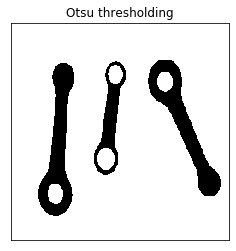

In [600]:
kernel = np.ones((2,2), np.uint8)   
# actually this is a dilation
imgf = cv.erode(imgf, kernel, iterations=1)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply closing operation

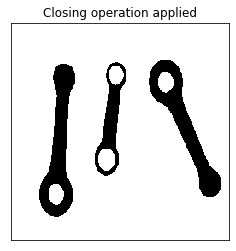

In [601]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(2,2))
closing = cv.morphologyEx(imgf, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap = 'gray')
plt.title('Closing operation applied'), plt.xticks([]), plt.yticks([])
plt.show()

### Labeling rods

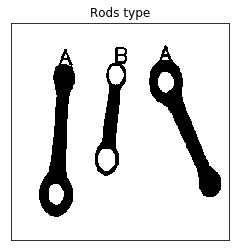

In [602]:
img, contours, hierarchy = cv.findContours(closing.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0:
        if len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) == 1:
            img = cv.putText(img, 'A', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
        elif len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) > 1:
            img = cv.putText(img, 'B', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
            
plt.show()

## Position, orientation, length, width and width at the barycenter Wb 

In [603]:
img = original_img.copy()

Position:  (53.42461395263672, 137.93777465820312) , Orientation:  -89.12532043457031
Length:  180.20799255371094 , Width:  41.102073669433594 , Width at the barycenter:  38.677818298339844
------------------------------------------------------------------------------------------------
Position:  (115.73360443115234, 112.93034362792969) , Orientation:  -84.80557250976562
Length:  134.80772399902344 , Width:  30.0578670501709 , Width at the barycenter:  28.067476272583008
------------------------------------------------------------------------------------------------
Position:  (201.55862426757812, 125.77984619140625) , Orientation:  -20.400209426879883
Length:  172.5138702392578 , Width:  42.93675231933594 , Width at the barycenter:  35.76982498168945
------------------------------------------------------------------------------------------------


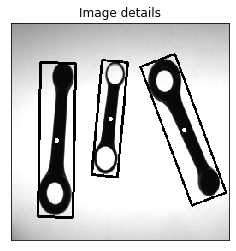

In [604]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        img = cv.drawContours(img,[box],0,(0, 255, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Position: ", rect[0], ", Orientation: ", rect[2])
        print("Length: ", rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1], ", Width: ", 
              rect[1][1] if rect[1][1] < rect[1][0] else rect[1][0], ", Width at the barycenter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(255, 0, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

### For each hole, position of the centre and diameter size

In [605]:
img = original_img.copy()

Centre position:  (52.5, 201.5)
Diameter:  17.227027893066406
------------------------------------------------------------------------------------------------
Centre position:  (111.5, 160.5)
Diameter:  19.186145782470703
------------------------------------------------------------------------------------------------
Centre position:  (122.40001678466797, 61.30000305175781)
Diameter:  16.348596572875977
------------------------------------------------------------------------------------------------
Centre position:  (180.5, 70.5)
Diameter:  17.531566619873047
------------------------------------------------------------------------------------------------


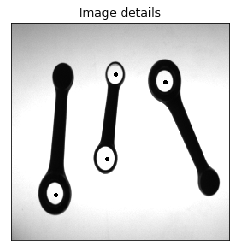

In [606]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] > 0:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        #img = cv.drawContours(img,[box],0,(255, 0, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Centre position: ", rect[0])
        #print("Diameter: ", ma)
        print("Diameter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(0, 255, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()